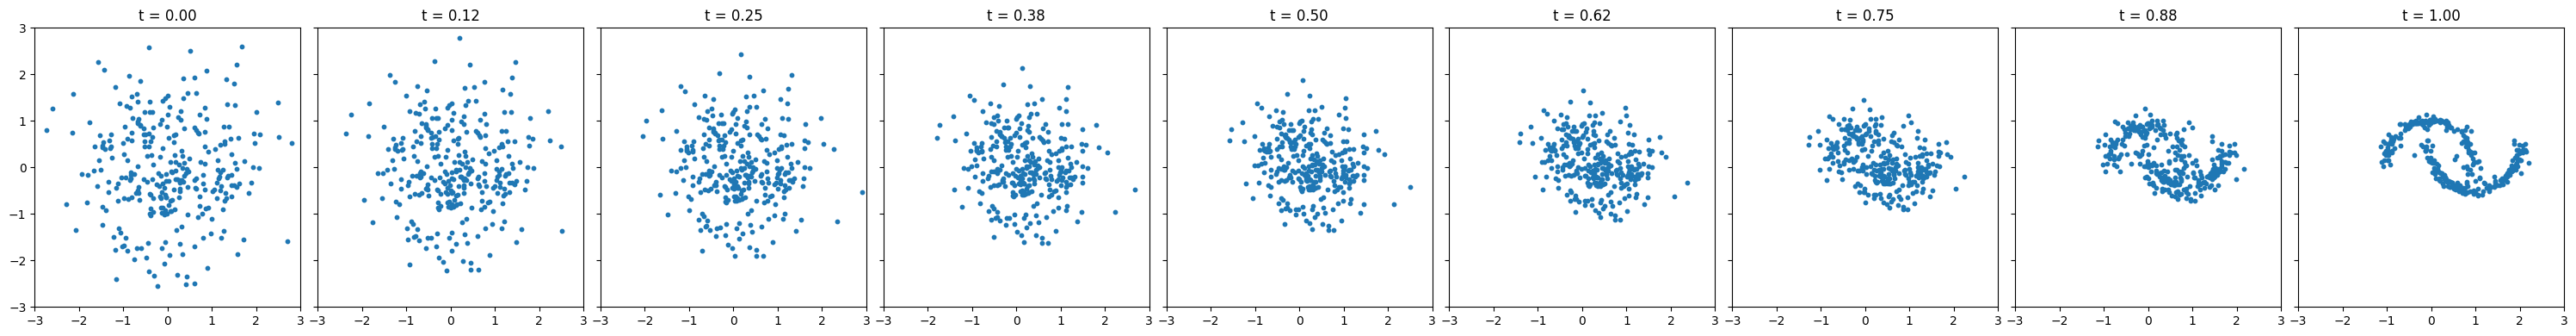

In [2]:
import torch
from torch import nn, Tensor
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Define the Flow model
class Flow(nn.Module):
    def __init__(self, dim: int = 2, h: int = 64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim + 1, h), nn.ELU(),
            nn.Linear(h, h), nn.ELU(),
            nn.Linear(h, h), nn.ELU(),
            nn.Linear(h, dim)
        )

    def forward(self, x_t: Tensor, t: Tensor) -> Tensor:
        return self.net(torch.cat((t, x_t), -1))

    def step(self, x_t: Tensor, t_start: Tensor, t_end: Tensor) -> Tensor:
        t_start = t_start.view(1, 1).expand(x_t.shape[0], 1)
        # Midpoint method for integrating the ODE
        return x_t + (t_end - t_start) * self(x_t + self(x_t, t_start) * (t_end - t_start) / 2,
                                             t_start + (t_end - t_start) / 2)

# Initialize model, optimizer, and loss function
flow = Flow()
optimizer = torch.optim.Adam(flow.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()

# Training loop
for _ in range(10000):
    x_1 = torch.tensor(make_moons(256, noise=0.05)[0], dtype=torch.float32)
    x_0 = torch.randn_like(x_1)
    t = torch.rand(len(x_1), 1)
    x_t = (1 - t) * x_0 + t * x_1
    dx_t = x_1 - x_0
    optimizer.zero_grad()
    loss = loss_fn(flow(x_t, t), dx_t)
    loss.backward()
    optimizer.step()

# Sampling and visualization
x = torch.randn(300, 2)
n_steps = 8
fig, axes = plt.subplots(1, n_steps + 1, figsize=(30, 4), sharex=True, sharey=True)
time_steps = torch.linspace(0, 1.0, n_steps + 1)

axes[0].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10)
axes[0].set_title(f't = {time_steps[0]:.2f}')
axes[0].set_xlim(-3.0, 3.0)
axes[0].set_ylim(-3.0, 3.0)

for i in range(n_steps):
    x = flow.step(x, time_steps[i], time_steps[i + 1])
    axes[i + 1].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10)
    axes[i + 1].set_title(f't = {time_steps[i + 1]:.2f}')

plt.tight_layout()
plt.show()

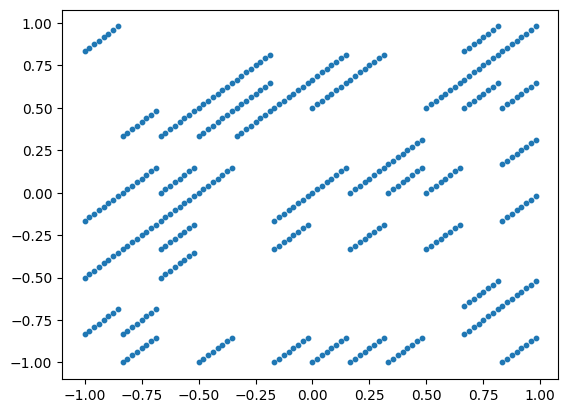

In [98]:
a = generate_diag_matrix(50)
jobs = np.argwhere(a)
jobs = (jobs - 48)/48
# plot the moon dataset
plt.scatter(jobs[:, 0], jobs[:, 1], s=10)
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, Tensor
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

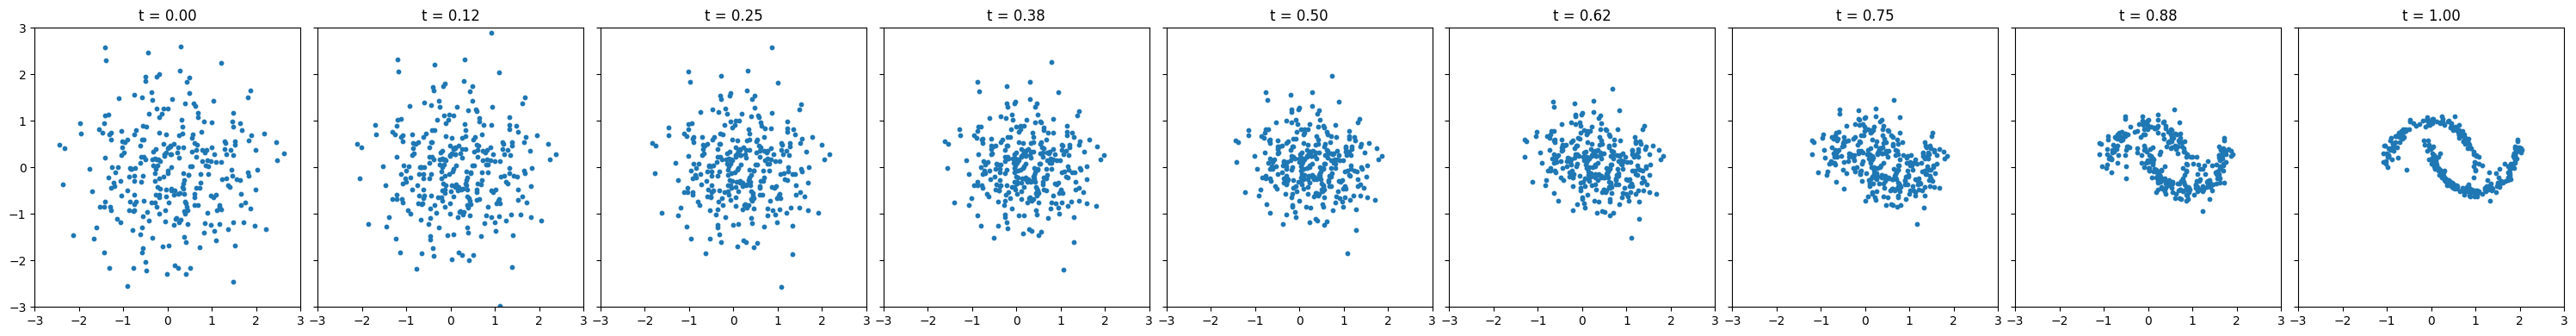

In [ ]:
def show_matrix(matrix):
    plt.figure(figsize=(4,4))
    plt.imshow(matrix, cmap='hot', interpolation='nearest')
    plt.show()

def generate_diag_matrix(n):
    a = np.zeros((96,96))
    # randomly pick n number from 0 to 144
    picked_submatrix = np.random.choice(144, n, replace=False)
    n = 0
    for i in range(12):
        for j in range(12):
            if n in picked_submatrix:
                a[i*8:(i+1)*8, j*8:(j+1)*8] = np.eye(8)
            n += 1
    return a

# Define the Flow model
class Flow(nn.Module):
    def __init__(self, dim: int = 2, h: int = 64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim + 1, h), nn.ELU(),
            nn.Linear(h, h), nn.ELU(),
            nn.Linear(h, h), nn.ELU(),
            nn.linear(h, h), nn.ELU(),
            nn.linear(h, h), nn.ELU(),
            nn.linear(h, h), nn.ELU(),
            nn.linear(h, h), nn.ELU(),
            nn.linear(h, h), nn.ELU(),
            nn.linear(h, h), nn.ELU(),
            nn.Linear(h, dim)
        )

    def forward(self, x_t: Tensor, t: Tensor) -> Tensor:
        return self.net(torch.cat((t, x_t), -1))

    def step(self, x_t: Tensor, t_start: Tensor, t_end: Tensor) -> Tensor:
        t_start = t_start.view(1, 1).expand(x_t.shape[0], 1)
        # Midpoint method for integrating the ODE
        return x_t + (t_end - t_start) * self(x_t + self(x_t, t_start) * (t_end - t_start) / 2,
                                             t_start + (t_end - t_start) / 2)


In [ ]:
# Initialize model, optimizer, and loss function
flow = Flow()
optimizer = torch.optim.Adam(flow.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()

a = generate_diag_matrix(10)
jobs = np.argwhere(a)
jobs = (jobs - 48)/48
# Training loop
for i in range(100000):

    x_1 = torch.tensor(jobs, dtype=torch.float32)
    x_0 = torch.randn_like(x_1)
    t = torch.rand(len(x_1), 1)
    x_t = (1 - t) * x_0 + t * x_1
    dx_t = x_1 - x_0
    optimizer.zero_grad()
    loss = loss_fn(flow(x_t, t), dx_t)
    loss.backward()
    optimizer.step()

# Sampling 2d vector from 0 to 95 integer
x = np.random.randint(0, 96, size=(80, 2))
x = torch.tensor(x, dtype=torch.float32)
x = (x - 48)/48

n_steps = 8
fig, axes = plt.subplots(1, n_steps + 1, figsize=(30, 4), sharex=True, sharey=True)
time_steps = torch.linspace(0, 1.0, n_steps + 1)

axes[0].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10)
axes[0].set_title(f't = {time_steps[0]:.2f}')
axes[0].set_xlim(-1.0, 1.0)
axes[0].set_ylim(-1.0, 1.0)

for i in range(n_steps):
    x = flow.step(x, time_steps[i], time_steps[i + 1])
    axes[i + 1].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10)
    axes[i + 1].set_title(f't = {time_steps[i + 1]:.2f}')

plt.tight_layout()
plt.show()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

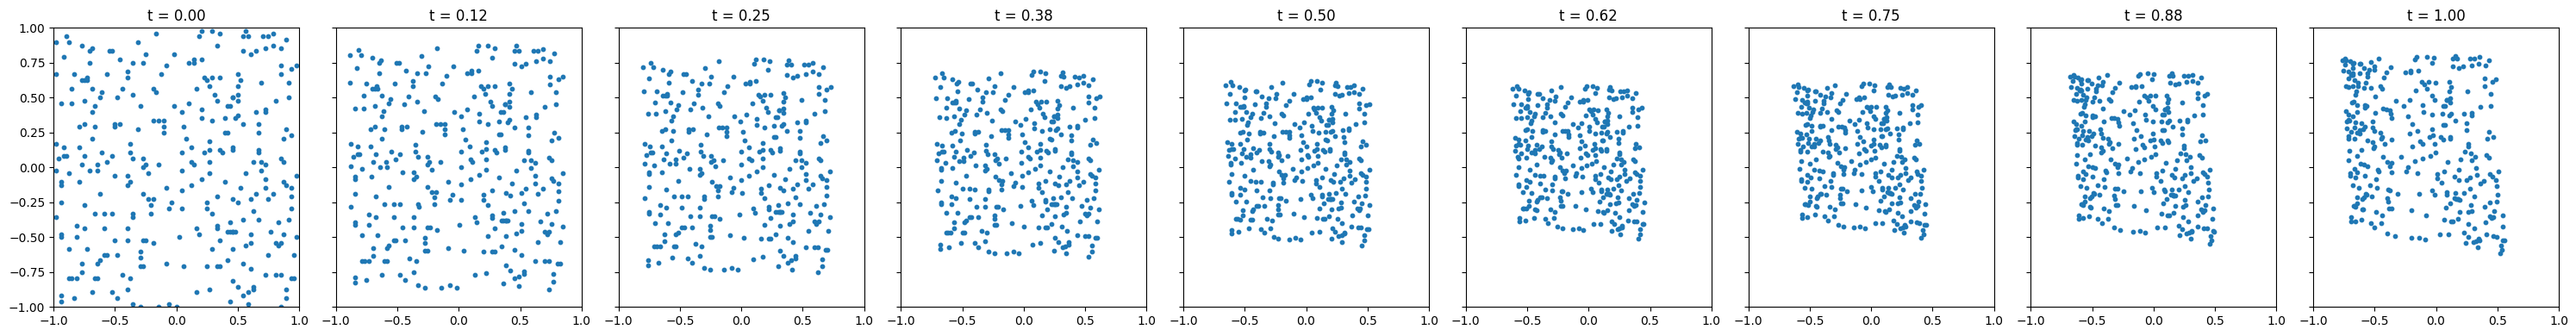

In [115]:
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, optimizer, and loss function
flow = Flow().to(device)
optimizer = torch.optim.Adam(flow.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()

# Training loop
for i in range(1000000):
    if i % 1000 == 0:
        a = generate_diag_matrix(40)
        jobs = np.argwhere(a)
        jobs = (jobs - 48)/48
        # Convert jobs to tensor and move to device
        jobs = torch.tensor(jobs, dtype=torch.float32).to(device)
    x_1 = jobs
    x_0 = torch.randn_like(x_1).to(device)
    t = torch.rand(len(x_1), 1).to(device)
    x_t = (1 - t) * x_0 + t * x_1
    dx_t = x_1 - x_0
    optimizer.zero_grad()
    loss = loss_fn(flow(x_t, t), dx_t)
    loss.backward()
    optimizer.step()

# Sampling 2d vector from 0 to 95 integer
x = np.random.randint(0, 96, size=(320, 2))
x = torch.tensor(x, dtype=torch.float32).to(device)
x = (x - 48)/48

n_steps = 8
fig, axes = plt.subplots(1, n_steps + 1, figsize=(30, 4), sharex=True, sharey=True)
time_steps = torch.linspace(0, 1.0, n_steps + 1).to(device)

axes[0].scatter(x.detach().cpu()[:, 0], x.detach().cpu()[:, 1], s=10)
axes[0].set_title(f't = {time_steps[0]:.2f}')
axes[0].set_xlim(-1.0, 1.0)
axes[0].set_ylim(-1.0, 1.0)

for i in range(n_steps):
    x = flow.step(x, time_steps[i], time_steps[i + 1])
    axes[i + 1].scatter(x.detach().cpu()[:, 0], x.detach().cpu()[:, 1], s=10)
    axes[i + 1].set_title(f't = {time_steps[i + 1]:.2f}')

plt.tight_layout()
plt.show()